In [165]:
import numpy as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [166]:
df=pd.read_csv("./data/mountains_vs_beaches_preferences.csv")
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [167]:
df.shape

(52444, 14)

In [168]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


In [169]:
df.columns=[col.lower().replace(' ','_') for col in df.columns]
df.head(3)

,age,gender,income,education_level,travel_frequency,preferred_activities,vacation_budget,location,proximity_to_mountains,proximity_to_beaches,favorite_season,pets,environmental_concerns,preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1


In [170]:
#calculate the %missing values

miss_value = df.isnull().sum()/df.shape[0]*100

#create data frame to show case the result
miss_value = pd.DataFrame({"Columns":miss_value.keys(),"%":miss_value})
miss_value.reset_index(drop=True, inplace=True)
miss_value

,Columns,%
0,age,0.0
1,gender,0.0
2,income,0.0
3,education_level,0.0
4,travel_frequency,0.0
5,preferred_activities,0.0
6,vacation_budget,0.0
7,location,0.0
8,proximity_to_mountains,0.0
9,proximity_to_beaches,0.0


In [171]:
df1['gender'].value_counts()

gender
0    17638
1    17522
2    17284
Name: count, dtype: int64

In [172]:
df1=df.copy()

In [173]:
df1.head()

,age,gender,income,education_level,travel_frequency,preferred_activities,vacation_budget,location,proximity_to_mountains,proximity_to_beaches,favorite_season,pets,environmental_concerns,preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [174]:
df1['gender']=df1['gender'].map({'female':1, 'male':0,'non-binary':2})

In [175]:
df1['gender']

0        0
1        0
2        1
3        2
4        1
        ..
52439    1
52440    1
52441    2
52442    1
52443    2
Name: gender, Length: 52444, dtype: int64

In [176]:
df1['education_level'].value_counts()

education_level
doctorate      13293
bachelor       13127
high school    13072
master         12952
Name: count, dtype: int64

In [177]:
df1['education_level']=df1['education_level'].map({'high school':1,'bachelor':2,'master':3,'doctorate':4})
df1['education_level']

0        2
1        3
2        3
3        1
4        1
        ..
52439    3
52440    2
52441    4
52442    4
52443    3
Name: education_level, Length: 52444, dtype: int64

In [178]:
df1['preferred_activities'].value_counts()

preferred_activities
sunbathing    13221
skiing        13167
hiking        13102
swimming      12954
Name: count, dtype: int64

In [179]:
df1['preferred_activities']=df1['preferred_activities'].map({'high sunbathing':1,'skiing':2,'hiking':3,'swimming':4})
df1['preferred_activities']

0        2.0
1        4.0
2        2.0
3        3.0
4        NaN
        ... 
52439    3.0
52440    4.0
52441    4.0
52442    4.0
52443    3.0
Name: preferred_activities, Length: 52444, dtype: float64

In [180]:
df1['location'].value_counts()

location
suburban    17503
urban       17476
rural       17465
Name: count, dtype: int64

In [181]:
df1['location']=df1['location'].map({'suburban':1,'urban':2,'rural':3})
df1['location']

0        2
1        1
2        2
3        3
4        1
        ..
52439    1
52440    2
52441    2
52442    1
52443    1
Name: location, Length: 52444, dtype: int64

In [182]:
df1['favorite_season'].value_counts()

favorite_season
summer    13303
fall      13170
winter    13019
spring    12952
Name: count, dtype: int64

In [183]:
# df1['favorite_season']=df1['favorite_season'].map({'summer':1,'fall':2,'winter':3,'spring':4})
# df1['favorite_season']

In [184]:
# df1['favorite_season']=LabelEncoder().fit_transform(data['favorite_season'])

In [185]:
from sklearn.preprocessing import LabelEncoder

In [186]:
encoding = LabelEncoder()

In [187]:
df1['favorite_season'] = encoding.fit_transform(df1['favorite_season'])
df1['favorite_season'].value_counts()

favorite_season
2    13303
0    13170
3    13019
1    12952
Name: count, dtype: int64

In [188]:
df1['gender']= encoding.fit_transform(df1['gender'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     52444 non-null  int64  
 1   gender                  52444 non-null  int64  
 2   income                  52444 non-null  int64  
 3   education_level         52444 non-null  int64  
 4   travel_frequency        52444 non-null  int64  
 5   preferred_activities    39223 non-null  float64
 6   vacation_budget         52444 non-null  int64  
 7   location                52444 non-null  int64  
 8   proximity_to_mountains  52444 non-null  int64  
 9   proximity_to_beaches    52444 non-null  int64  
 10  favorite_season         52444 non-null  int64  
 11  pets                    52444 non-null  int64  
 12  environmental_concerns  52444 non-null  int64  
 13  preference              52444 non-null  int64  
dtypes: float64(1), int64(13)
memory usage:

In [189]:
df1['education_level']=encoding.fit_transform(df1['education_level'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     52444 non-null  int64  
 1   gender                  52444 non-null  int64  
 2   income                  52444 non-null  int64  
 3   education_level         52444 non-null  int64  
 4   travel_frequency        52444 non-null  int64  
 5   preferred_activities    39223 non-null  float64
 6   vacation_budget         52444 non-null  int64  
 7   location                52444 non-null  int64  
 8   proximity_to_mountains  52444 non-null  int64  
 9   proximity_to_beaches    52444 non-null  int64  
 10  favorite_season         52444 non-null  int64  
 11  pets                    52444 non-null  int64  
 12  environmental_concerns  52444 non-null  int64  
 13  preference              52444 non-null  int64  
dtypes: float64(1), int64(13)
memory usage:

In [190]:
df1['preferred_activities']=encoding.fit_transform(df1['preferred_activities'])

In [191]:
df1['location']=encoding.fit_transform(df['location'])

In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     52444 non-null  int64
 1   gender                  52444 non-null  int64
 2   income                  52444 non-null  int64
 3   education_level         52444 non-null  int64
 4   travel_frequency        52444 non-null  int64
 5   preferred_activities    52444 non-null  int64
 6   vacation_budget         52444 non-null  int64
 7   location                52444 non-null  int64
 8   proximity_to_mountains  52444 non-null  int64
 9   proximity_to_beaches    52444 non-null  int64
 10  favorite_season         52444 non-null  int64
 11  pets                    52444 non-null  int64
 12  environmental_concerns  52444 non-null  int64
 13  preference              52444 non-null  int64
dtypes: int64(14)
memory usage: 5.6 MB


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [194]:
X=df1.drop('preference', axis=1)
y=df1['preference']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [254]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [258]:
y_test.value_counts()

preference
0    11843
1     3891
Name: count, dtype: int64

In [259]:
y_train.value_counts()

preference
0    27453
1     9257
Name: count, dtype: int64

In [260]:
from sklearn.utils import resample

In [261]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.columns

Index(['age', 'gender', 'income', 'education_level', 'travel_frequency',
       'preferred_activities', 'vacation_budget', 'location',
       'proximity_to_mountains', 'proximity_to_beaches', 'favorite_season',
       'pets', 'environmental_concerns', 'preference'],
      dtype='object')

In [262]:
# Separate majority and minority classes
majority_class = train_data[train_data['preference']==0]
minority_class = train_data[train_data['preference']==1]

In [263]:
minority_upsample=resample(minority_class, 
                          replace=True,
                          n_samples=len(majority_class),
                          random_state=42)

In [264]:
majority_class=majority_class.reset_index(drop = True)
minority_upsample=minority_upsample.reset_index(drop=True)

In [265]:
majority_class['preference'].value_counts()

preference
0    27453
Name: count, dtype: int64

In [266]:
majority_class = majority_class.reset_index(drop=True)
minority_upsample = minority_upsample.reset_index(drop=True)

In [267]:
upsample_train=pd.concat([majority_class,minority_upsample], axis=0)

# Remove duplicate columns
# upsample_train = upsample_train.loc[:, ~upsample_train.columns.duplicated()]

# # Check the columns to ensure duplicates are removed
print(upsample_train.columns)

Index(['age', 'gender', 'income', 'education_level', 'travel_frequency',
       'preferred_activities', 'vacation_budget', 'location',
       'proximity_to_mountains', 'proximity_to_beaches', 'favorite_season',
       'pets', 'environmental_concerns', 'preference'],
      dtype='object')


In [268]:
# x_train_upsampled = upsample_train.drop('preference', axis=1)
# y_train_upsampled = upsample_train['preference']

In [269]:
X_trainup = upsample_train.drop('preference',axis=1)
y_trainup = upsample_train['preference']

In [270]:
y_trainup.value_counts()

preference
0    27453
1    27453
Name: count, dtype: int64

In [273]:
model.fit(X_trainup, y_trainup)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

r2_train=  0.5332386260153718
r2_test=  0.37755231736698724


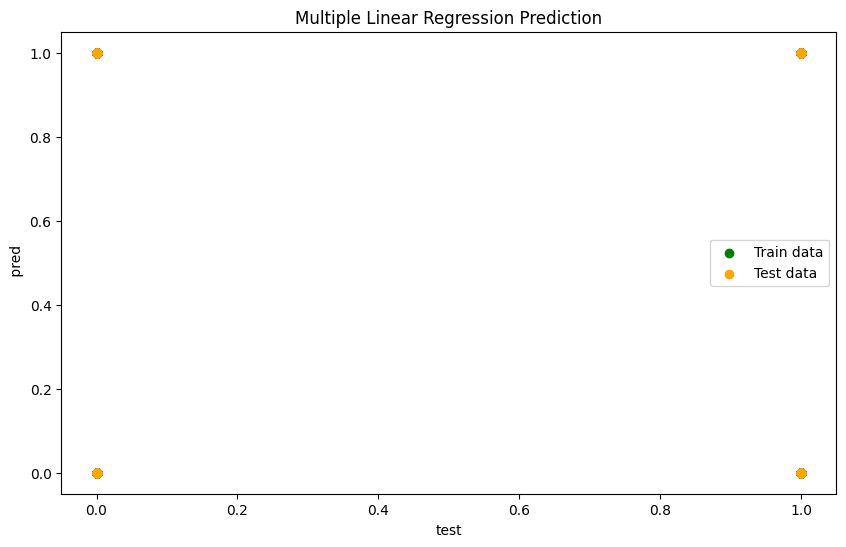

In [284]:
from sklearn.metrics import r2_score
y_train_pred = model.predict(X_trainup)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_trainup,y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('r2_train= ',r2_train)
print('r2_test= ',r2_test)
plt.figure(figsize =(10,6))
plt.scatter(y_trainup,y_train_pred, color='green', label='Train data')
plt.scatter(y_test,y_test_pred, color='orange',label='Test data')
#plt.plot(y_train,y_train_pred, color='blue',label='train Plot')
#plt.plot(y_test,y_test_pred, color='black',label='test Plot')
plt.xlabel("test")
plt.ylabel(" pred")
plt.legend()
plt.title("Multiple Linear Regression Prediction")
plt.show()

In [277]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[10468,  1375],
       [  448,  3443]])

Text(0.5, 427.9555555555555, 'Predicted label')

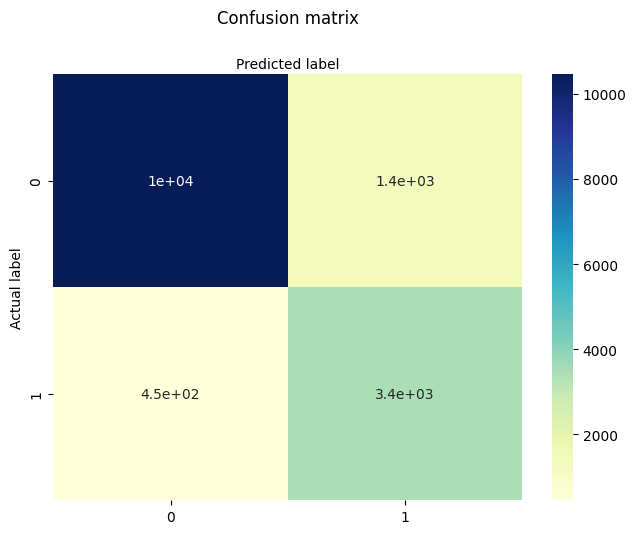

In [278]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [283]:
print("Accuracy:", round(accuracy_score(y_test, y_test_pred)*100,2),'%')
print("Precision:", round(precision_score(y_test, y_test_pred)*100,2),'%')
print("Recall:", round(recall_score(y_test, y_test_pred)*100,2),'%')

Accuracy: 88.41 %
Precision: 71.46 %
Recall: 88.49 %
